In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [541]:
#Median Income
Y2018 = pd.read_csv('2018_med_income.csv')
Y2018 = Y2018.set_index(Y2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2017 = pd.read_csv('2017_med_income.csv')
Y2017 = Y2017.set_index(Y2017['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2016 = pd.read_csv('2016_med_income.csv')
Y2016 = Y2016.set_index(Y2016['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2015 = pd.read_csv('2015_med_income.csv')
Y2015 = Y2015.set_index(Y2015['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2014 = pd.read_csv('2014_med_income.csv')
Y2014 = Y2014.set_index(Y2014['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2013 = pd.read_csv('2013_med_income.csv')
Y2013 = Y2013.set_index(Y2013['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2012 = pd.read_csv('2012_med_income.csv')
Y2012 = Y2012.set_index(Y2012['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2011 = pd.read_csv('2011_med_income.csv')
Y2011 = Y2011.set_index(Y2011['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
Y2010 = pd.read_csv('2010_med_income.csv')
Y2010 = Y2010.set_index(Y2010['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])[:-2]
lst = Y2010.index.tolist()
idx = lst.index('615.00')
lst[idx] = '615'
Y2010.index = lst

def get_avg_income(df):
    df = df.drop(df.columns[[-1,-2,-3,-4]], axis=1)
    df = df.set_index(df['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])

    household = df.iloc[:,2]
    household = household[household!='-']
    household = household[household!='(X)']
    return np.average(household.astype(float))

sf_median_income = [get_avg_income(Y2010),get_avg_income(Y2011),get_avg_income(Y2012),get_avg_income(Y2013),
                    get_avg_income(Y2014),get_avg_income(Y2015),get_avg_income(Y2016),get_avg_income(Y2017),
                    get_avg_income(Y2018)]

def get_tract_income(df,tract):
    return df.iloc[:,2][tract]

In [551]:
#demographics
dem_2018 = pd.read_csv('2018_demographic.csv')
dem_2018 = dem_2018.set_index(dem_2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2017 = pd.read_csv('2017_demographic.csv')
dem_2017 = dem_2017.set_index(dem_2017['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2016 = pd.read_csv('2016_demographic.csv')
dem_2016 = dem_2016.set_index(dem_2016['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2015 = pd.read_csv('2015_demographic.csv')
dem_2015 = dem_2015.set_index(dem_2015['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2014 = pd.read_csv('2014_demographic.csv')
dem_2014 = dem_2014.set_index(dem_2014['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2013 = pd.read_csv('2013_demographic.csv')
dem_2013 = dem_2013.set_index(dem_2013['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2012 = pd.read_csv('2012_demographic.csv')
dem_2012 = dem_2012.set_index(dem_2012['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2011 = pd.read_csv('2011_demographic.csv')
dem_2011 = dem_2011.set_index(dem_2011['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
dem_2010 = pd.read_csv('2010_demographic.csv')
dem_2010 = dem_2010.set_index(dem_2010['Geographic Area Name'].str.extract('(\d+.*\d+)')[0])
lst_dem = dem_2010.index.tolist()
idx = lst_dem.index('615.00')
lst_dem[idx] = '615'
dem_2010.index = lst_dem

def get_avg_demographics(df):
    minority = df.iloc[:,4]/ df.iloc[:,2]
    return minority.mean()

sf_white = [get_avg_demographics(dem_2010),get_avg_demographics(dem_2011),get_avg_demographics(dem_2012),
                  get_avg_demographics(dem_2013),get_avg_demographics(dem_2014),get_avg_demographics(dem_2015),
                  get_avg_demographics(dem_2016),get_avg_demographics(dem_2017),get_avg_demographics(dem_2018)]

def get_tract_demo(df,tract):
    return (df.iloc[:,4]/ df.iloc[:,2]).loc[tract]

In [552]:
#housing price
housing = pd.read_csv('Effect - Housing Prices (Zillow).csv')
housing = housing.drop(['Metro','StateName','State','City','RegionType','CountyName'],axis=1)
dates = list(housing.columns[housing.columns.str.match('12/31/1[0-8]{1}')])
housing = housing[['RegionName']+dates]
sf_housing_prices = housing[dates].mean()

In [553]:
#Housing price II Mapping neighborhoods
sf_nhood = pd.read_csv('sf_neighborhoods')
new = []
for x in sf_nhood.NAME:
    if x%1==0:
        new += [str(int(x))]
        
    else:
        new += [str(x)]
        
sf_nhood['NAME']=new

# Renaming the neighborhoods so they match to the zillow dataset
lst_housing = list(housing.RegionName)
lst_housing[0]='Sunset/Parkside'
lst_housing[4]='Sunset/Parkside'
lst_housing[13]='Bayview Hunters Point'
lst_housing[22]='Oceanview/Merced/Ingleside'
lst_housing[28]='Lone Mountain/USF'
lst_housing[37]='Financial District/South Beach'
lst_housing[43]='Castro/Upper Market'
lst_housing[51]='Financial District/South Beach'

housing['RegionName']=lst_housing

common = sf_nhood[['NAME','NHOOD']].merge(housing,left_on='NHOOD',right_on='RegionName')
tract_housing_prices = common.set_index('NAME')[dates]

In [554]:
#coffee shops
coffee = pd.read_csv('coffee_sf_filtered.csv')

In [555]:
#evictions


Text(0.5, 1.0, 'SF Gentrification index')

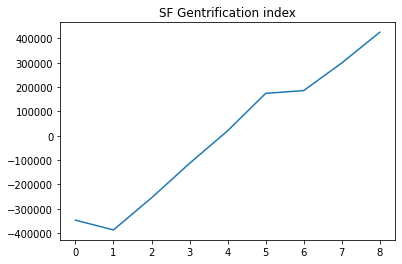

In [556]:
#Gentrification index for SF
from sklearn.decomposition import PCA

years=pd.Series([2010,2011,2012,2013,2014,2015,2016,2017,2018])

X = pd.DataFrame(sf_median_income)
X = X.rename(columns={0: 'median_income'})
X = X.set_index(years)
X['housing_prices']=list(sf_housing_prices)
X['minority']=sf_nonwhite
X

pca = PCA(n_components=1)
plt.plot(pca.fit_transform(X))
plt.title('SF Gentrification index')

## NEED TO FIX BUG

In [596]:
#Gentrification index for all census tracts
tracts = Y2018['Geographic Area Name'].str.extract('(\d+.*\d+)')[0]

lst_df_incomes = [Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018]
lst_df_demo = [dem_2010,dem_2011,dem_2012,dem_2013,dem_2014,dem_2015,dem_2016,dem_2017,dem_2018]

def pca_per_tract(tract_str):

    tract_med = [get_tract_income(x,tract_str) for x in lst_df_incomes]
    tract_white = [get_tract_demo(x,tract_str) for x in lst_df_demo]
    tract_house = tract_housing_prices.loc[tract_str]

    X = pd.DataFrame(zip(tract_med,tract_race,tract_house),columns=["tract_med",'tract_white','tract_house'])
    
    pca = PCA(n_components=1)
    y = pca.fit_transform(X)
    return y

results=[]
for x in tracts:
    try:
        results+= [pca_per_tract(x)]
    except:
        pass
    

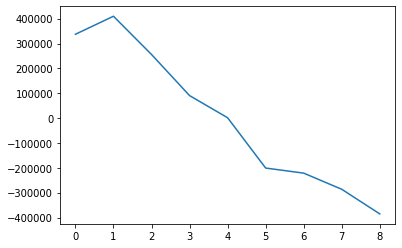

In [660]:
tract_med = [get_tract_income(x,'102') for x in lst_df_incomes]
tract_white = [get_tract_demo(x,'102') for x in lst_df_demo]
tract_house = list(tract_housing_prices.loc['102'])

X = pd.DataFrame(zip(tract_med,tract_race,tract_house),columns=["tract_med",'tract_white','tract_house'])

pca = PCA(n_components=1)
y = pca.fit_transform(X)
plt.plot(y)

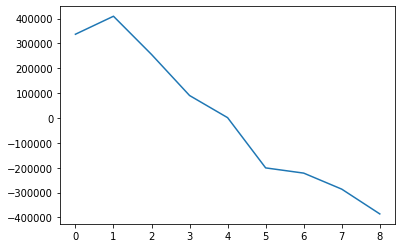

In [654]:
plt.plot(results[7])

In [600]:
len(tracts)

197